<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Clase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mínimos cuadrados 

En esta practica nos dedicamos ajustar un conjunto de datos $\{(x_1,y_1),\dots,(x_n,y_n\}$ por una funcion lineal. Y mas generalmente consideramos otros tipos de ajustes.


Dado el conjunto de observaciones $\{(x_1,y_1),\dots,(x_n,y_n\}$ queremos determinar de entre todas las funciones lineales $f(x) =\alpha +\beta x$ la que mejor ajusta a los datos en el sentido de que 
$$
S(\alpha,\beta) = \sum_{i=1}^n(y_i - f(x_i))^2 = \sum_{i=1}^n(y_i - \alpha -\beta x_i)^2
$$

tome el valor mínimo. Es decir, los parametros $\alpha,\beta$ optimos, denotados algunas veces como $\alpha^*, \beta^*$ satisfacen que 

$$
(\alpha^*, \beta^*) = \displaystyle\arg\min_{\alpha, \beta}S(\alpha,\beta)
$$

Notación:  Denotamos a veces por $\hat{y_i}= f(x_i) = \alpha^* +\beta^* x_i$ para representar el valor predicho de $y_i$.


## Ecuaciones Normales: 

Estas ecuaciones nos dan una expresión de los parámetros optimos $\alpha^*,\beta^*$. Un poco de notacion primero:

$$
{\bf y} = \begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} , \quad {\bf x} = \begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix},\quad  X = \begin{bmatrix}1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}
$$

asi: ${\bf y}, {\bf x} \in \mathbb{R}^{n\times 1}, \quad X \in \mathbb{R}^{n\times 2}$

entonces 

$$
X^TX\begin{bmatrix}\alpha \\ \beta \end{bmatrix} = X^T {\bf y}
$$

Si la matrix $X^TX$ de $\mathbb{R}^{2\times 2}$ resulta ser inversible, tenemos na fórmula para los parametros:

$$
\begin{bmatrix}\alpha \\ \beta \end{bmatrix} = (X^TX)^{-1}X^T {\bf y}
$$


## Rutinas:

Primero implementemos una funcion en python que para un conjunto de datos $x$, $y$ nos devuelva la funcion lineal que mejor ajusta en el sentido de minimos cuadrados:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def reglineal(x, y):

  """
  Esta funcion calcula los coeficientes de una regresion lineal simple. Devuelve la funcion a + bx 
  Inputs:
  x : numpy array dimension n
  y : numpy array dimension n

  Return:
  f : poly1D: objeto polinomio de python. f es un polinomio de grado 1: alpha* +beta*x
  """
  n = len(x)
  X = np.ones((n,2))

  X[:, 1] = x

  coefs =  np.linalg.solve(X.T @ X, np.dot(X.T, y))

  a = coefs[0]
  b = coefs[1]

  f = np.poly1d([b, a])

  return f

## Ejercicio 1:

El objetivo de este problema es poder predecir la duración de una erupcion del **geyser Old Faithful** a partir del tiempo que transcurre entre una erupción y otra:

 <center>
  <table>
		<tr>
		<td>$x$= tiempo de espera (min): </td> <td> 79</td> <td> 54 </td> <td>74 </td> <td>62 </td> <td> 85</td> <td> 55</td> <td>88 </td>
		</tr>
    <tr>
		<td> $y$ = duracion de erupcion (min):  </td> <td> 3.6 </td> <td> 1.8 </td> <td> 3.333 </td> <td>2.283 </td> <td> 4.533</td> <td> 2.883 </td> <td> 4.7</td>
		</tr>
	</table>
</center>





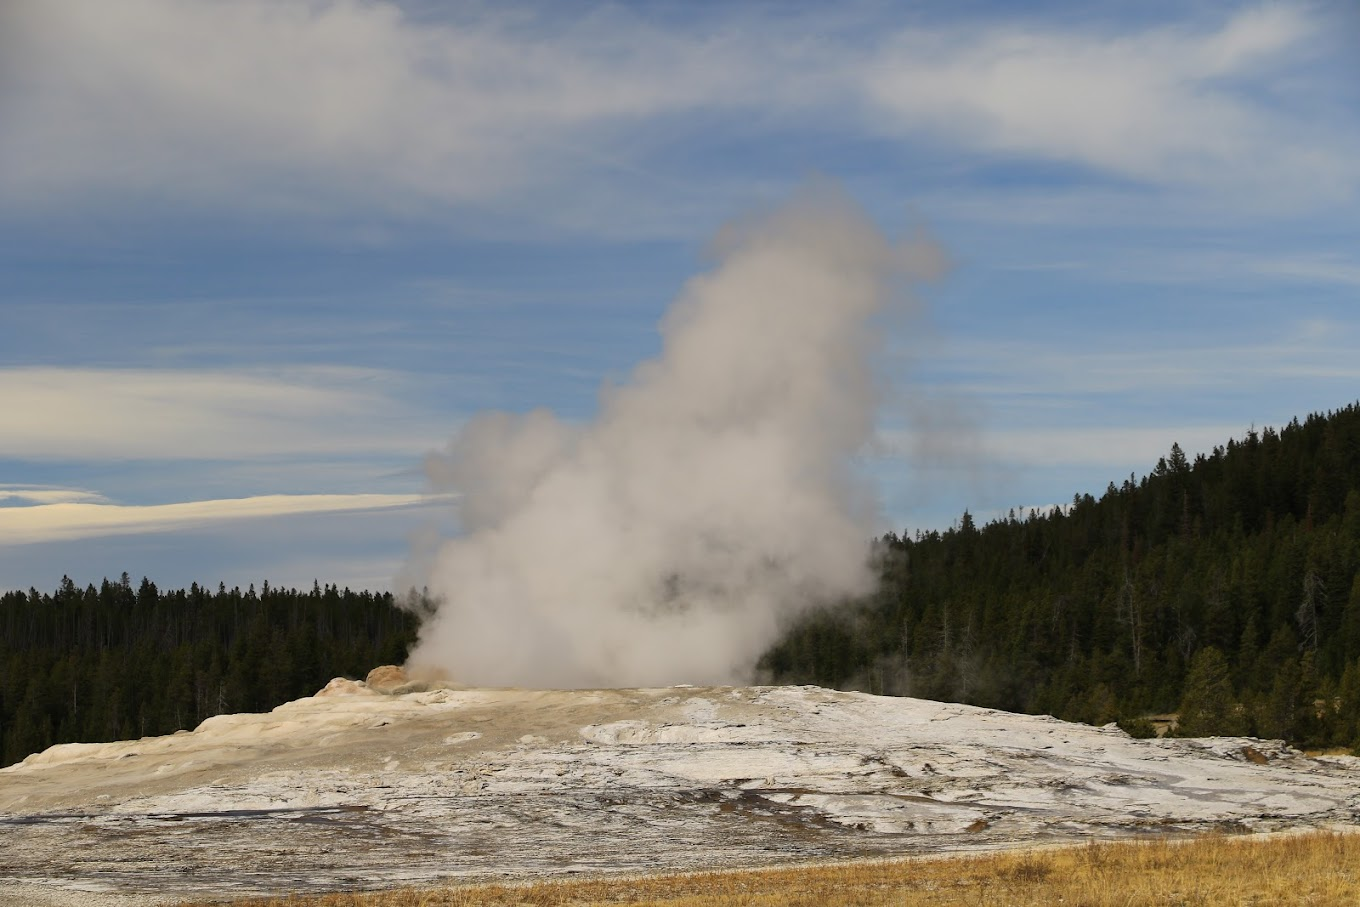



In [ ]:
# cargamos los datos:
x = np.array([79, 54, 74, 62, 85, 55, 88])
y = np.array([3.6, 1.8, 3.333, 2.283, 4.533, 2.883, 4.7])

f = reglineal(x, y)

print(f)


 
0.07169 x - 1.786


En este caso: $\alpha^* = -1.786$, $\beta^* = 0.07169$

A partir de esta funcion de ajuste podemos predecir la duracion de la siguiente erupcion si pasaron entre esta y la anterior 80 min:

$$
\hat{y} = -1.786 + 0.07169*80
$$

In [ ]:
print("la duracion de esta erupcion, dado que pasaron 80 min desde la ultima es: f(80) = ", f(80))

la duracion de esta erupcion, dado que pasaron 80 min desde la ultima es: f(80) =  3.9498197393822405


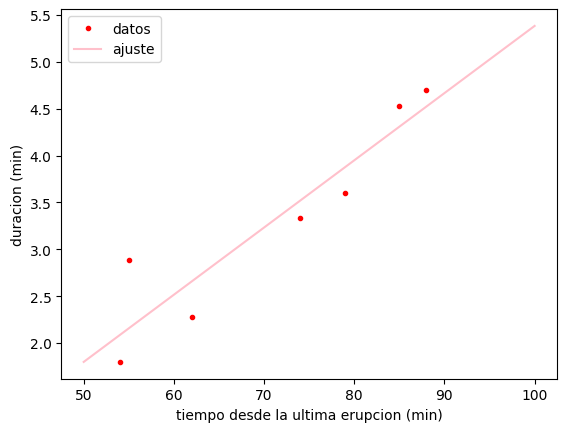

In [ ]:
# ploteamos los datos y la funcion de ajuste:
grilla = np.linspace(start = 50, stop = 100, num = 100)


plt.plot(x, y, ".", label = "datos", color = "red")
plt.plot(grilla, f(grilla), label = "ajuste", color = "pink")
plt.ylabel("duracion (min)")
plt.xlabel("tiempo desde la ultima erupcion (min)")
plt.legend()
plt.show()


Consideremos el mismo problema, solo que ahora tenemos muchos mas datos y estos estan guardados en un archivo con algun formato, por ejemplo **.txt** (archivo de texto) o **.csv** (comma separated values)

En este caso vamos a usar la libreria <font color = "magenta"> pandas </font> de python que nos permite leer el archivo y convertirlo en una "tabla de datos", un dato del estilo <em> data frame</em>

El archivo puede ser leido desde un url (direccion de un sitio en internet) o puede estar guardado en la compu y accedemos a el con su nombre. 

Lo hacemos de ambas formas:

In [ ]:
url = "https://raw.githubusercontent.com/binaria010/Mate2B/main/Segunda%20Parte/MinimosCuadrados/geyser.csv"

data_faithful = pd.read_csv(url, header = 0)   # cargamos el archivo y lo convierte en un data frame. Le indicamos header =0  porque la fila 0 es el nombre de las columnas

data_faithful.head(20)    #nos muestra las primeras 5 filas de los datos

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
5,2.883,55
6,4.700,88
7,3.600,85
8,1.950,51
9,4.350,85


Una vez cargado el archivo y generado el data frame, le podemos pedir que nos de el x y el y por separado:


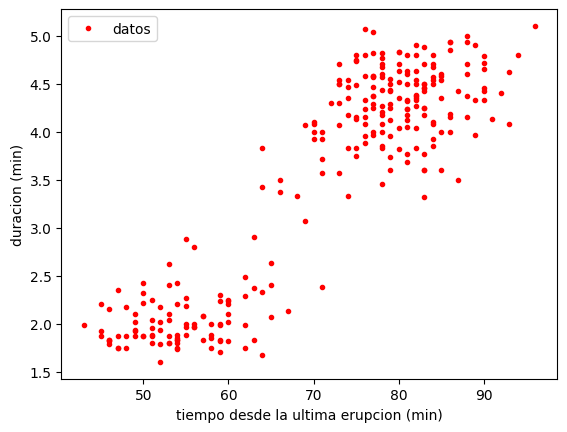

In [ ]:
x_todas = np.array(data_faithful["waiting"])  # la columna "waiting" es la x, la convertimos en un array de numpy
y_todas = np.array(data_faithful["eruptions"])  # la columna "eruptions" es la y, la convertimos en un array de numpy


#ploteemos los datos para tener una idea:

plt.plot(x_todas, y_todas, ".", label = "datos", color = "red")
plt.ylabel("duracion (min)")
plt.xlabel("tiempo desde la ultima erupcion (min)")
plt.legend()
plt.show()




Ahora si, con estos x e y hacemos el ajuste lineal con la funcion reglineal:


In [ ]:
f_completa = reglineal(x_todas, y_todas)



In [ ]:
print("EL ajuste lineal con 7 observaciones es:  ", f)

print("\n\nEL ajuste lineal con todas las observaciones es: ", f_completa)

EL ajuste lineal con 7 observaciones es:    
0.07169 x - 1.786


EL ajuste lineal con todas las observaciones es:   
0.07563 x - 1.874


Realicemos un plot de ambos ajustes y sus respectivs conjuntos de observaciones:

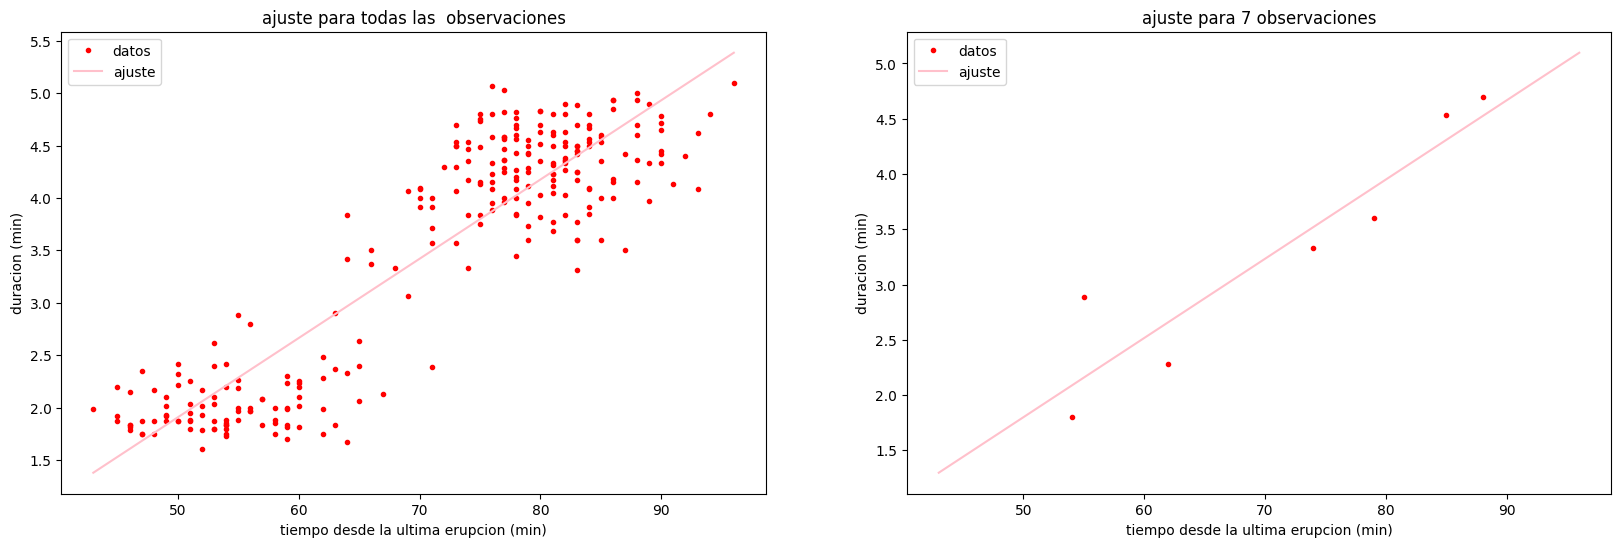

In [ ]:
grilla2 = np.linspace(start = np.min(x_todas), stop = np.max(x_todas), num = 100)

plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.plot(x_todas, y_todas, ".", label = "datos", color = "red")
plt.plot(grilla2, f_completa(grilla2), label = "ajuste", color = "pink")
plt.ylabel("duracion (min)")
plt.xlabel("tiempo desde la ultima erupcion (min)")
plt.title("ajuste para todas las  observaciones")
plt.legend()
#plt.show()


plt.subplot(122)
plt.plot(x, y, ".", label = "datos", color = "red")
plt.plot(grilla2, f(grilla2), label = "ajuste", color = "pink")
plt.ylabel("duracion (min)")
plt.xlabel("tiempo desde la ultima erupcion (min)")
plt.title("ajuste para 7 observaciones")
plt.legend()


plt.show()


Calculemos el R2  (que es la medida de bondad del ajuste) de ambas regresiones:

In [ ]:
def R2(x,y):

  """
  Esta funcion calcula el r^2 de la regresion lineal dados los datos x, y
  """

  f = reglineal(x, y)
  y_predicho = f(x)
  avg_y = np.mean(y)

  numerador = np.sum((y_predicho - avg_y)**2)
  denominador = np.sum((y - avg_y)**2)

  return numerador/denominador

In [ ]:
R2_7obs = R2(x, y)

R2_todas = R2(x_todas, y_todas)

In [ ]:
print("El R2 del ajuste lineal con 7 observaciones es:  ", R2_7obs)

print("\n\nEL R2 del ajuste lineal con todas las observaciones es: ", R2_todas)

El R2 del ajuste lineal con 7 observaciones es:   0.8657680980930657


EL R2 del ajuste lineal con todas las observaciones es:  0.811460760973295


El error de ambos ajustes es:

In [ ]:
y_7obs_predicho = f(x)   # las predicciones para los distintos valores de x (en el conjunto de 7 observaciones)
avg_y_7obs = np.mean(y)  # el promedio de las 7 observaciones y 

error_7obs = np.mean((y_7obs_predicho - avg_y_7obs)**2)


y_todas_predicho = f_completa(x_todas)
avg_y_todas =  np.mean(y_todas)

error_todas = np.mean((y_todas_predicho - avg_y_todas)**2)


In [ ]:
print("Error del ajuste usando 7 obs es : ", error_7obs)

print("\n\nError del ajuste usando todos los datos es: ", error_todas)

Error del ajuste usando 7 obs es :  0.869405525579152


Error del ajuste usando todos los datos es:  1.053226479740812


## Ejercicio:

Resolver ejercicios 1, 2 y 4 de practica 5